# Lab - 8

Name: Purusharth Malik

Registration No.: 2348542

In [4]:
# Importing the libraries
import cv2
import math 
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [7]:
# Loading the configuration file
with open(r"S:\christ\trisem_3\dl\yolo\data.yaml", "r") as file:
    config = yaml.safe_load(file)

In [9]:
# Loading a random sample
import random

img = cv2.imread(f"S:\\christ\\trisem_3\\dl\\yolo\\val\\{random.randint(1,7)}.png")

### Loading the YOLOv8 model

In [11]:
model = YOLO("yolov8n.pt")

100%|██████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:19<00:00, 330kB/s]


In [13]:
classNames = config['names']


0: 640x352 1 person, 228.9ms
Speed: 8.0ms preprocess, 228.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 352)
Confidence ---> 0.79
Class name --> Saree


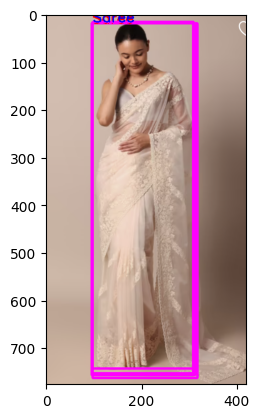

In [17]:
results = model(img)

# Coordinates
for r in results:
    boxes = r.boxes

    for box in boxes:
        # Bounding box
        x1, y1, x2, y2 = box.xyxy[0]
        # Convert to int values
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Put box in image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

        # Confidence
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)

        # Class name
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)

        # Object details
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2

        cv2.putText(img, class_name, org, font, fontScale, color, thickness)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# End